# Data exploration

In [1]:
#Import the dataset from scikit
from sklearn.datasets import load_iris
#Import libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = load_iris()

#Inserting the data into pandas data frame
df_iris = pd.DataFrame(iris.data,columns = iris.feature_names)
#Including the target (species) column, 0 = setosa, 1 = versicolor, 2 = virginica
df_iris["target"] = pd.Series(iris.target)

In [3]:
# We can see that there is an equal distribution of measurments for each spieces
df_iris["target"].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [4]:
#Let's take a look at the dataset
df_iris.info()
df_iris

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


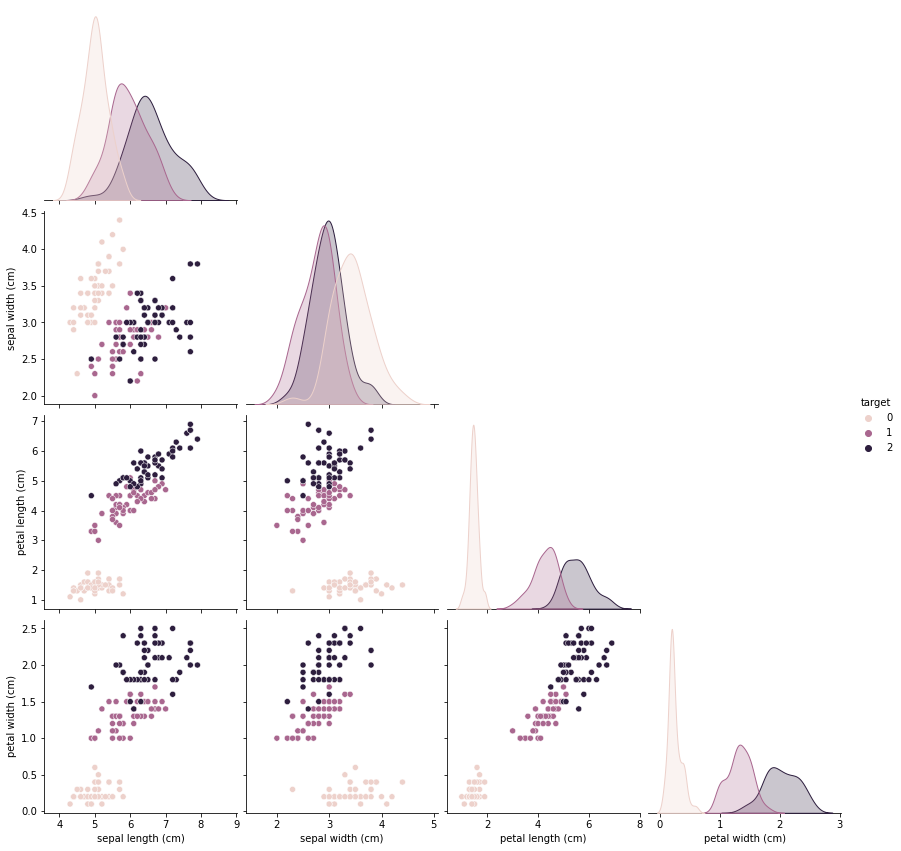

In [5]:
#There are 4 individual measurments for each specimen.
#There are six unique ways to plot the results using Pair-plot
sb.pairplot(df_iris,hue = "target",corner = True, height = 3)
plt.show()
#Reminder - Setosa:Pale pink; Versicolor:Purple; Virginicg:Black;

Here we can see six different plots under the diagonal that are linearly seperatable.
Not all of the plots distinguishs between 3 different groups therefore, we will pay our attention to the ones who does.
We can learn from the histograms that the best seperations between the groups are with petal width and petal length

We can evaluate from that:
if PL<=2 & PW<=1 --> Setosa ; if (PW<1.75 && PW>=0.9) & (PL<5 && PL>2.5) --> Versicolor

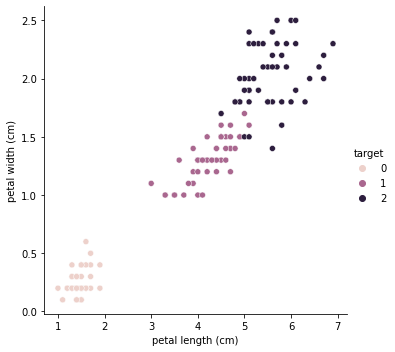

In [6]:
sb.relplot(data=df_iris,x="petal length (cm)", y="petal width (cm)", hue="target")
plt.show()

# Using simple rough algorithm to classify - only for small data amount like in this example

In [7]:
#First, we need to seperate the measurments from their classes.
X=df_iris.drop(columns=["target"])
Y=df_iris["target"]
# Also, we can determine only by petal length and width
X_petal = X.drop(columns=["sepal length (cm)","sepal width (cm)"])

In [8]:
#row[0] = petal length ; row[1] = petal width
arr=[]

for row in X_petal.to_numpy():
    if row[0]<=2 and row[1]<=1:
        arr.append(np.append(row,0))
    elif ((row[0]<=5 and row[0]>2.5) and (row[1]<1.75 and row [1]>0.9)):
        arr.append(np.append(row,1))
    else:arr.append(np.append(row,2))
    

In [9]:
#convertin arr into a numpy array
arr=np.stack( arr, axis=0 )

#creating a dataframe
df_petal_sorted = pd.DataFrame(arr,columns =["petal length (cm)","petal width (cm)","target"] )

#inserting the other data
df_petal_sorted.insert(0,"sepal length (cm)",df_iris["sepal length (cm)"] )
df_petal_sorted.insert(1,"sepal width (cm)",df_iris["sepal width (cm)"] )

#converting the target column data type to int for comparison with the original data
df_petal_sorted = df_petal_sorted.astype({"target": int})

#comparison
df_petal_sorted.compare(df_iris)


target      
      self other
70     2.0   1.0
83     2.0   1.0
106    1.0   2.0
119    1.0   2.0

we can see that there are 4 errors overall due to the overlapping data between the 1 and 2 groups, and due to the rough (boxed) boundries I have defined.

# Second algorithm

In this section, I will try to solve the problem by implementing logistic regression because we can categorize the results (target).
For this puprpose, we need to save some of the measurements for learning and some for testing.

In [10]:
# I will split the data into 70% for learning and 30% for testing.
from sklearn.model_selection import train_test_split
# same as before, we want to split the data so the dataset is denoted by X and the target column is Y.
# X=df_iris.drop(columns=["target"])
# Y=df_iris["target"]
x_learn, x_test, y_learn, y_test = train_test_split(X, Y, test_size = 0.3)
# Now the data is divided

In [11]:
from sklearn.linear_model import LogisticRegression
learning_model = LogisticRegression()

# training the model
learning_model.fit(x_learn, y_learn)

LogisticRegression()

In [12]:
# we can check for accuracy - this will change as we shuffle the data and change the test size
learning_model.score(x_test,y_test)

1.0

In [53]:
# We can see from the confusion matrix that we have predicted correctly and we have a match
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,learning_model.predict(x_test))

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 14]], dtype=int64)